# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Faizal
- **Email:** faizzalmuh87@gmail.com
- **ID Dicoding:** muhammad_faizal_BiTn

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penggunaan sepeda berdasarkan kondisi cuaca selama dua tahun terakhir di Washington D. C.?
- Bagaimana perbedaan pola penggunaan sepeda antara hari kerja dan hari libur selama dua tahun terakhir di Washington D. C.?

## Import Semua Packages/Library yang Digunakan

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [85]:
#Masukkan data day.csv
day_df = pd.read_csv("day.csv", delimiter=",")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [86]:
#Masukkan data hour.csv
hour_df = pd.read_csv("hour.csv", delimiter=",")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Assesing day_df table

In [87]:
#Mengecek tipe data
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [88]:
#Memastikan missing values
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [89]:
#Memeriksa duplikasi data
print("Jumlah duplikasi data day_csv: ", day_df.duplicated().sum())

Jumlah duplikasi data day_csv:  0


In [90]:
#Memeriksa statistik deskriptif
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Assesing hour_df table

In [91]:
#Mengecek tipe data
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [92]:
#Memastikan missing values
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [93]:
#Memeriksa duplikasi data
print("Jumlah duplikasi data hour_csv: ", hour_df.duplicated().sum())

Jumlah duplikasi data hour_csv:  0


In [94]:
#Memeriksa statistik deskriptif
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Dari proses assesing data maka akan
1.   Mengubah tipe data fitur dteday ke datetime karena menunjukkan tanggal
2.   Mengubah tipe data fitur  weekday, season, holiday, mnth, workingday, dan weathersit ke tipe kategorik


#### Cleaning day_df table


In [95]:
#Mengubah tipe data fitur dteday ke datetime
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [96]:
#Mengubah tipe data fitur  weekday, season, holiday, mnth, workingday, dan weathersit ke tipe kategorik
columns = ['weekday','season', 'holiday', 'mnth', 'workingday', 'weathersit']

for column in columns:
    day_df[column] =  day_df[column].astype("category")
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(6), datetime64

In [97]:
#Mengembalikan ke arti yang seharusnya untuk fitur dengan keterangan yang tidak terlalu banyak

#weekday
day_df.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
#season
day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
#mnth
day_df.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12), ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
#workingday
day_df.workingday.replace((0,1), ('otherwise','neither weekend nor holiday'), inplace=True)

#### Cleaning hour_df table

In [98]:
#Mengubah tipe data fitur dteday ke datetime
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [99]:
#Mengubah tipe data fitur  weekday, season, holiday, mnth, workingday, dan weathersit ke tipe kategorik
columns = ['weekday','season', 'holiday', 'mnth', 'workingday', 'weathersit']

for column in columns:
    hour_df[column] =  hour_df[column].astype("category")
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [100]:
#Mengembalikan ke arti yang seharusnya untuk fitur dengan keterangan yang tidak terlalu banyak

#weekday
day_df.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
#season
day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
#mnth
day_df.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12), ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
#workingday
day_df.workingday.replace((0,1), ('otherwise','neither weekend nor holiday'), inplace=True)

## Exploratory Data Analysis (EDA)

### Explore day_df table

In [101]:
#Memeriksa statistik deskriptif
day_df.describe()

,instant,yr,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.500684,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.500342,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,0.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,1.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,1.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Dari deskripsi statistik di atas didapatkan bahwa jumlah pengguna sepeda yang tidak terdaftar (non-anggota) yang meminjam sepeda minimal 2 orang per hari dan maksimal 3410 per hari dengan jumlah pengguna sepeda yang terdaftar (anggota) yang meminjam sepeda minimal 20 orang perhari dan maksimal 6946 orang perhari.

In [102]:
# Menghitung statistik deskriptif untuk penggunaan sepeda berdasarkan kondisi cuaca
weather_desc = day_df.groupby(day_df['weathersit'])['cnt'].describe()

# Cetak deskripsi statistik untuk setiap kondisi cuaca
print("Statistik Deskriptif untuk Penggunaan Sepeda per Jenis Kondisi Cuaca:")
print(weather_desc)


Statistik Deskriptif untuk Penggunaan Sepeda per Jenis Kondisi Cuaca:
            count         mean          std    min     25%     50%     75%  \
weathersit                                                                   
1           463.0  4876.786177  1879.483989  431.0  3636.5  4844.0  6458.5   
2           247.0  4035.862348  1809.109918  605.0  2674.5  4040.0  5257.5   
3            21.0  1803.285714  1240.284449   22.0   705.0  1817.0  2424.0   

               max  
weathersit          
1           8714.0  
2           8362.0  
3           4639.0  


Kondisi cuaca 1, terdapat 463 data penggunaan sepeda dengan rata-rata 4876.79. Nilai standar deviasinya adalah 1879.48, yang menunjukkan variasi yang cukup besar dalam penggunaan sepeda. Nilai minimum penggunaan sepeda pada kondisi cuaca 1 adalah 431 dan maksimumnya adalah 8714. Diikuti kondisi cuaca 2 dan terakhir kondisi cuaca 3. Tidak terdeteksi data untuk kondisi cuaca 4.

#### Exploratory hour_df table

In [103]:
#Memeriksa statistik deskriptif
hour_df.describe()

,instant,yr,hr,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,0.502561,11.546752,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,0.500008,6.914405,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,0.000000,6.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,1.000000,12.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,1.000000,18.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,1.000000,23.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Dari deskripsi statistik di atas didapatkan bahwa terdapat kondisi saat tidak ada peminjaman sepeda per jam dan ada kondisi maksimal 977 orang peminjaman per jam.

In [104]:
# Menghitung statistik deskriptif untuk penggunaan sepeda pada hari kerja
workday_desc = hour_df[hour_df['workingday'] == 1]['cnt'].describe()

# Menghitung statistik deskriptif untuk penggunaan sepeda pada hari libur
holiday_desc = hour_df[hour_df['workingday'] == 0]['cnt'].describe()

print("Statistik Deskriptif untuk Penggunaan Sepeda pada Hari Kerja:")
print(workday_desc)
print("\nStatistik Deskriptif untuk Penggunaan Sepeda pada Hari Libur:")
print(holiday_desc)


Statistik Deskriptif untuk Penggunaan Sepeda pada Hari Kerja:
count    11865.000000
mean       193.207754
std        185.107477
min          1.000000
25%         40.000000
50%        151.000000
75%        277.000000
max        977.000000
Name: cnt, dtype: float64

Statistik Deskriptif untuk Penggunaan Sepeda pada Hari Libur:
count    5514.000000
mean      181.405332
std       172.853832
min         1.000000
25%        40.000000
50%       119.000000
75%       292.000000
max       783.000000
Name: cnt, dtype: float64


Rata-rata jumlah penggunaan sepeda pada hari kerja adalah sekitar 193.21, sedangkan pada hari libur adalah sekitar 181.41.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penggunaan sepeda berdasarkan kondisi cuaca selama dua tahun terakhir di Washington D. C.?

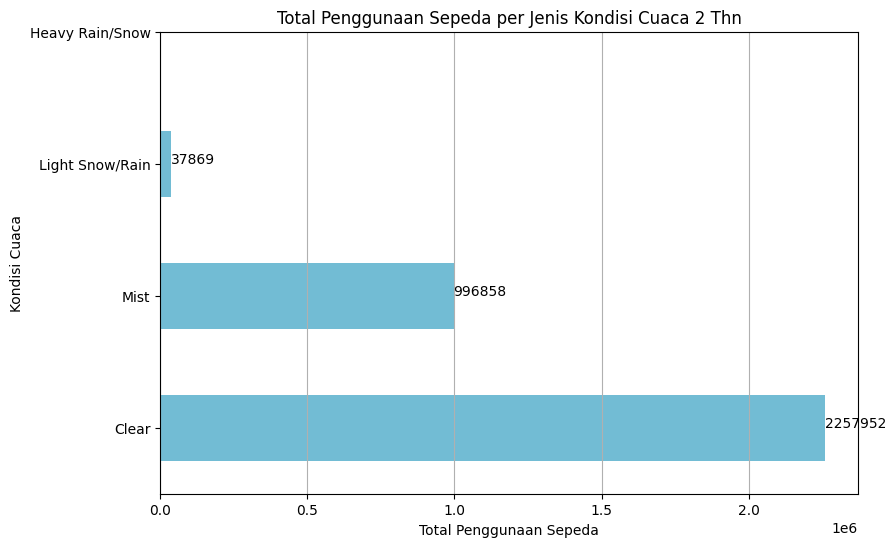

In [105]:
# Mengelompokkan data per jenis kondisi cuaca (weathersit) dan menghitung jumlah total penggunaan sepeda
weather_total = day_df.groupby(day_df['weathersit'])['cnt'].sum()

# Membuat bar chart horizontal
plt.figure(figsize=(9, 6))
weather_total.plot(kind='barh', color="#72BCD4")
plt.title('Total Penggunaan Sepeda per Jenis Kondisi Cuaca 2 Thn')
plt.xlabel('Total Penggunaan Sepeda')
plt.ylabel('Kondisi Cuaca')
plt.yticks(range(0, 4), ['Clear', 'Mist', 'Light Snow/Rain', 'Heavy Rain/Snow'])
plt.grid(axis='x')
for index, value in enumerate(weather_total):
    plt.text(value, index, str(value))
plt.show()

### Pertanyaan 2: Bagaimana perbedaan pola penggunaan sepeda antara hari kerja dan hari libur selama dua tahun terakhir di Washington D. C.?

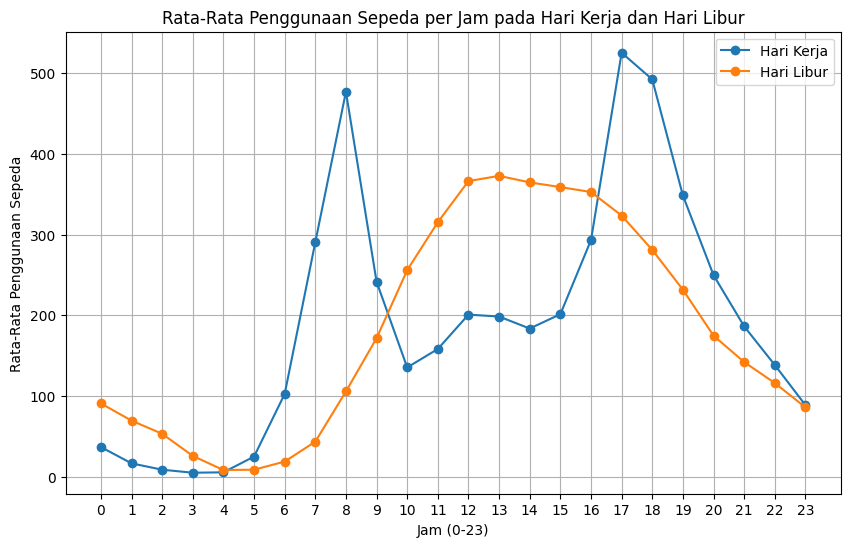

In [106]:
# Mengelompokkan data per jam, berdasarkan hari kerja (workingday) atau hari libur (holiday)
hourly_avg_workday = hour_df[hour_df['workingday'] == 1].groupby(hour_df['hr'])['cnt'].mean()
hourly_avg_holiday = hour_df[hour_df['workingday'] == 0].groupby(hour_df['hr'])['cnt'].mean()

# Membuat line chart
plt.figure(figsize=(10, 6))
plt.plot(hourly_avg_workday, marker='o', label='Hari Kerja')
plt.plot(hourly_avg_holiday, marker='o', label='Hari Libur')
plt.title('Rata-Rata Penggunaan Sepeda per Jam pada Hari Kerja dan Hari Libur')
plt.xlabel('Jam (0-23)')
plt.ylabel('Rata-Rata Penggunaan Sepeda')
plt.grid(True)
plt.xticks(range(24))
plt.legend()
plt.show()

## Conclusion

- Dari visualisasi pertama, terlihat bahwa penggunaan sepeda paling tinggi terjadi pada kondisi cuaca yang cerah (Clear), diikuti oleh kondisi cuaca berkabut (Mist). Penggunaan sepeda cenderung lebih rendah pada kondisi cuaca dengan hujan ringan atau salju ringan, dan sangat rendah bahkan tidak ada data pada kondisi cuaca dengan hujan deras atau salju tebal.
- Dari visualisasi kedua, dapat dilihat bahwa rata-rata penggunaan sepeda lebih tinggi pada hari kerja dibandingkan dengan hari libur di sebagian besar jam. Terlihat bahwa lonjakan penggunaan sepeda naik pada pukul 8 Pagi sebagai jam masuk kerja dan pukul 17 Sore sebagai jam pulang kerja. Ini menunjukkan bahwa sebagian besar pengguna sepeda menggunakan sepeda mereka untuk keperluan komuter atau bekerja pada hari kerja.

## Teknik Analisis Lanjutan

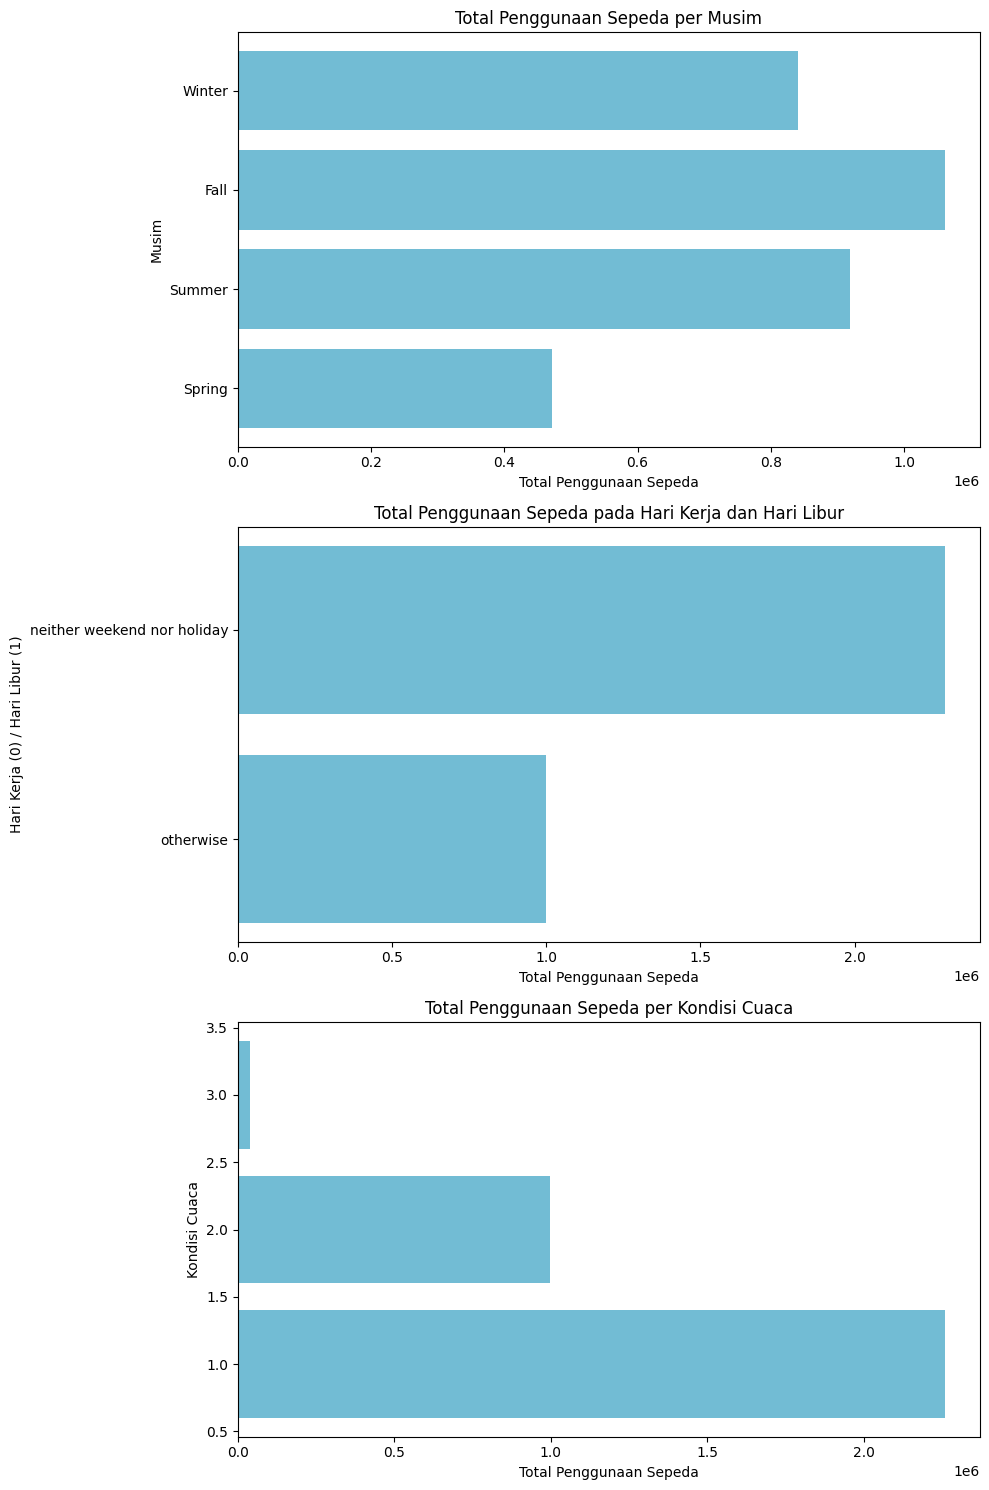

In [107]:
# Mengelompokkan data berdasarkan musim, hari kerja, dan kondisi cuaca, serta menghitung jumlah total penggunaan sepeda
seasonal_total = day_df.groupby('season')['cnt'].sum()
workday_total = day_df.groupby('workingday')['cnt'].sum()
weather_total = day_df.groupby('weathersit')['cnt'].sum()

# Membuat visualisasi dengan diagram batang horizontal
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Visualisasi untuk musim
axes[0].barh(seasonal_total.index, seasonal_total.values, color='#72BCD4')
axes[0].set_title('Total Penggunaan Sepeda per Musim')
axes[0].set_xlabel('Total Penggunaan Sepeda')
axes[0].set_ylabel('Musim')

# Visualisasi untuk hari kerja
axes[1].barh(workday_total.index, workday_total.values, color='#72BCD4')
axes[1].set_title('Total Penggunaan Sepeda pada Hari Kerja dan Hari Libur')
axes[1].set_xlabel('Total Penggunaan Sepeda')
axes[1].set_ylabel('Hari Kerja (0) / Hari Libur (1)')

# Visualisasi untuk kondisi cuaca
axes[2].barh(weather_total.index, weather_total.values, color='#72BCD4')
axes[2].set_title('Total Penggunaan Sepeda per Kondisi Cuaca')
axes[2].set_xlabel('Total Penggunaan Sepeda')
axes[2].set_ylabel('Kondisi Cuaca')

plt.tight_layout()
plt.show()

In [108]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [109]:
hour_df.to_csv("hour_new.csv", index=False)

In [110]:
day_df.to_csv("day_new.csv", index=False)